# PID Manager

## A Little Bit Of Control System Theory

### Second Order System
Wide range of the practical Linear Time-Continuous Systems belongs to a class of **second order systems**, which behavior can be described using order differential expression

$m\ddot{x}(t) + b\dot{x}(t) + kx(t) = u(t)$  
    Where x is state varible, u(t): input (external force) 

- Spring mass system, damped harmonic oscillator: x: position, m: mass, b: = damping coefficient, k: spring constant
- RLC elecrical circuit: x: voltage accross capacitor, m = LC, b = RC, k = 1, u(t) applied voltage

Note the steady state position $x(\infty) = \frac u k$

$\omega_0 = \sqrt \frac k m$,  damping ratio: $\zeta  = \frac b {2 \sqrt {mk}}$ >1: overdamped, <1: underdamped

#### Transfer function
The transfer function of the system: $TF=\frac {Output} {Input}$

It is convenient to use Laplace transform ($s=\sigma + j \omega$), then the transfer function of the second order system:
$ TF_{mbk} = \frac {x(t)} {u(t)} = \frac 1 {ms^2 +bs + k}$

### Practical special cases of the Second Order System:
#### Zero order system (m=0, b=0): $kx(t) = u(t)$
* **Amplifier**, gain = 1/k, $TF: \frac 1 k$

#### First order system (m=0): $b\dot{x}(t) + kx(t) = u(t)$
* **Amplified low pass filter**: 
$TF=\frac 1 {bs + k}$ or $G \frac 1 {{\tau}s + 1}$, Gain $G=\frac 1 k$, and $\tau=bG$ is the *filter time constant*.

* **RC filter**: $RC \cdot {\dot{x}(t) + x(t)} = u(t)$, $TF = \frac 1 {RC\cdot s + 1}$

## PID Controller

*Ideal Form* of the PID Controller:
<img src="PID.PNG" width="400"/>

$u(t) = K_p e(t) + K_i \int {e(t)dt} + K_d \frac {de(t)} {dt}$

In the standard form of the equation $K_i$ and $K_d$ are respectively replaced by $\frac {K_p} {T_i}$ and $K_p T_d$; the advantage of this being that $T_i, T_d$ have some understandable physical meaning, as they represent the integration time and the derivative time respectively.

Transfer function of PID with TF=H and and a plant fith TF=G: $G=\frac{GH}{GH+1}$

TF of PID: $\frac{K_ds^2+K_ps+K_i}s$

### Transfer function of the PID controlling a second order system
$\frac {K_ds^2+K_ps+K_i} {ms^3+(b+K_d)s^2+(k+K_p)s+K_i}$ 

### Staility criterion (from the Control Theory):

The system is stable if complex poles of the transfer function have negative real part.


## Practical example

### Plant is an amplifier (m=0, b=0, gain = 1/k). 
TF = $\frac {K_ds^2+K_ps+K_i} {K_ds^2+(k+K_p)s+K_i}$ 

The stable system can be achieved with $K_p=0, K_d=0$ and $TF=\frac {K_i} {ks+K_i}$

Indeed, the pole is $-\frac {K_i} k$ and the system is stable.

#### Conclusion
The amplifier (zero order system) can be stabilized using PID with only I term.
*The $K_i$ should be selected, based on desired settling time $K_i = \frac 1 {\tau_s}$




In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pid_utils as pu

In [71]:
import imp # this is for python3
imp.reload(pu)

<module 'pid_utils' from 'C:\\Users\\User\\github\\Control\\pid_utils.py'>

controller:PI/I, zeros,poles,gain:
 (array([], dtype=float64), array([-1.]), 1.0)


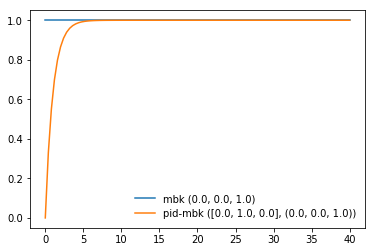

In [73]:
mbk = 0., 0., 1.
t = np.linspace(0, 40,101)
tout, y = signal.step(pu.spring_mass_system(mbk),T=t)
plt.plot(tout, y, label='mbk '+str(mbk))
pid = [0.,1.,0.]
tout, y3 = signal.step(pu.pid_spring_mass(mbk,pid), T=t)
plt.plot(tout, y3, label='pid-mbk '+str((pid,mbk)))
plt.legend(loc='lower right', frameon=False)
plt.show()
